#                 Prediction Using Supervised ML

In [5]:
# importing libraries required in this task 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline              
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
#import dataset 

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
X = data.iloc[:, :-1].values
#print X
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
Y = data.iloc[:,1].values

# print Y

Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# DATA VISUALIZATION 
#### Plotting data in a scatter form so as to get a clear sense of it 

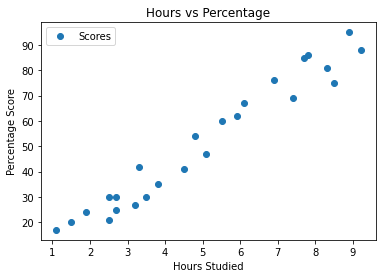

In [23]:
# Score distribution scatter plot

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Plotting Linear Regression Model 
#### Splitting data into training and testing data 

In [22]:
# Splitting the data 

x = data.iloc[:,:-1].values
y=data.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

# Model and Algorithm Training 

In [24]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_train)

In [25]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training has been completed!")

Training has been completed!


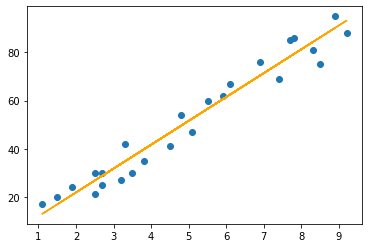

In [21]:
# Plot Orange regression line 

line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color = 'orange');
plt.show()

In [27]:
print(x_test)
y_pred= regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Gauging accuracy of the training and testing dataset 

In [13]:
print("Test score ")
print(regressor.score(x_test, y_test))
print("Training Score ")
print(regressor.score(x_train, y_train))

Test score 
0.9454906892105356
Training Score 
0.9515510725211552


# Predictions 

In [28]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
# Predicting score for 9.25 hours 

print('Predicted score if a student studies 9.25 hour/day', regressor.predict([[9.25]]))

Predicted score if a student studies 9.25 hour/day [93.69173249]


# Checking efficiency of the model 

In [32]:
from sklearn import metrics
print("Mean Absolute Error is ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error is ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error is  4.183859899002975
Mean Squared Error is  21.5987693072174
Root Mean Squared Error is  4.6474476121003665
